In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import shutil
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val
from PIL import Image

In [35]:
from glob import glob
trn1='E:/zois-data/jpg/train/*/'
trn2='E:/zois-data/jpg/test/*/'

tr1= glob(trn1)
tr2= glob(trn2)

In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [74]:
from scipy.ndimage.filters import convolve

data = []
label = []
limit = []
l = 0

for i in tr1:
    s = 0
    y = glob(i+'/*')
    for j in range(0,len(y)):
        
        if(y[j][-4:] == 'data'):
            continue
            
        data.append(y[j])
        label.append(l)
        s = s + 1
        
    limit.append(s)
    l=l+1

#kk = []
l=0
s=0
te_label = []
te_data = []

for i in tr2:
    s = 0
    y = glob(i+'/*')
    for j in range(0,len(y)):
        
        if(y[j][-4:] == 'data'):
            continue
            
        te_data.append(y[j])
        te_label.append(l)
        s = s + 1
        
        if(s>limit[l]-1):
            break
    l=l+1
    #kk.append(s)
    
imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i]).convert('L')
    b = a.resize((64, 64))
    c = np.array(b)
    kernel = np.ones((3, 3)) / 9
    filtered_img_arr = convolve(c, kernel)
    c = Image.fromarray(filtered_img_arr.astype(np.uint8))
    c = np.array(c)
    imgdata.append(c.reshape(64,64,1))
    
te_imgdata=[]
for i in range(len(te_data)):
    a = Image.open(te_data[i]).convert('L')
    b = a.resize((64, 64))
    c = np.array(b)
    kernel = np.ones((3, 3)) / 9
    filtered_img_arr = convolve(c, kernel)
    c = Image.fromarray(filtered_img_arr.astype(np.uint8))
    c = np.array(c)
    te_imgdata.append(c.reshape(64,64,1))    

C:\Users\chowd\AppData\Local\Temp\ipykernel_17848\1208724356.py:1: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


In [75]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),64,64,1))
# One hot vector representation of labels
Y_train = to_categorical(label)

X_train,Y_train = shuffle(X_train,Y_train)

idata = np.array(te_imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),64,64,1))
# One hot vector representation of labels
Y_test = to_categorical(te_label)

X_test,Y_test = shuffle(X_test,Y_test)

In [56]:

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), input_shape=(64, 64,1)))
model.add(layers.Conv2D(16, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3),))
model.add(layers.Conv2D(32, (3, 3),))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(2))
model.add(layers.Dense(7,activation="softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 16)        160       
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                  

In [13]:

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=('accuracy'))

model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split = .3, verbose = 1)

Epoch 1/20
55/55 [==============================] - 2s 17ms/step - loss: 1.6765 - accuracy: 0.3375 - val_loss: 1.4744 - val_accuracy: 0.4498
Epoch 2/20
55/55 [==============================] - 1s 13ms/step - loss: 1.4192 - accuracy: 0.4615 - val_loss: 1.3267 - val_accuracy: 0.5087
Epoch 3/20
55/55 [==============================] - 1s 12ms/step - loss: 1.2749 - accuracy: 0.5218 - val_loss: 1.2241 - val_accuracy: 0.5248
Epoch 4/20
55/55 [==============================] - 1s 13ms/step - loss: 1.1585 - accuracy: 0.5637 - val_loss: 1.1135 - val_accuracy: 0.5837
Epoch 5/20
55/55 [==============================] - 1s 13ms/step - loss: 1.0394 - accuracy: 0.5907 - val_loss: 1.0181 - val_accuracy: 0.6051
Epoch 6/20
55/55 [==============================] - 1s 13ms/step - loss: 0.9228 - accuracy: 0.6125 - val_loss: 0.9672 - val_accuracy: 0.5823
Epoch 7/20
55/55 [==============================] - 1s 13ms/step - loss: 0.8147 - accuracy: 0.6630 - val_loss: 0.8821 - val_accuracy: 0.6386
Epoch 8/20
55

In [14]:
score, acc = model.evaluate(X_test, Y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

72/72 [==============================] - 0s 6ms/step - loss: 3.8498 - accuracy: 0.4229
Test score: 3.8497636318206787
Test accuracy: 0.42294222116470337


In [77]:
import os
import keras
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

from keras.applications.vgg16 import VGG16
from keras.models import load_model, Model
from keras.layers import Input, Conv2D, MaxPooling2D

model = VGG16(weights='imagenet', include_top=False)

In [78]:
model = VGG16(weights='imagenet', include_top=False)

# Block1_conv1 weights are of the format [3, 3, 3, 64] -> this is for RGB images
# For grayscale, format should be [3, 3, 1, 64]. Weighted average of the features has to be calculated across channels.
# RGB weights: Red 0.2989, Green 0.5870, Blue 0.1140

# getting weights of block1 conv1.
block1_conv1 = model.get_layer('block1_conv1').get_weights()
weights, biases = block1_conv1

# :weights shape = [3, 3, 3, 64] - (0, 1, 2, 3)
# convert :weights shape to = [64, 3, 3, 3] - (3, 2, 0, 1)
weights = np.transpose(weights, (3, 2, 0, 1))


kernel_out_channels, kernel_in_channels, kernel_rows, kernel_columns = weights.shape

# Dimensions : [kernel_out_channels, 1 (since grayscale), kernel_rows, kernel_columns]
grayscale_weights = np.zeros((kernel_out_channels, 1, kernel_rows, kernel_columns))

In [79]:
# iterate out_channels number of times
for i in range(kernel_out_channels):

	# get kernel for every out_channel
	get_kernel = weights[i, :, :, :]

	temp_kernel = np.zeros((3, 3))

	# :get_kernel shape = [3, 3, 3]
	# axis, dims = (0, in_channel), (1, row), (2, col)

	# calculate weighted average across channel axis
	in_channels, in_rows, in_columns = get_kernel.shape

	for in_row in range(in_rows):
		for in_col in range(in_columns):
			feature_red = get_kernel[0, in_row, in_col]
			feature_green = get_kernel[1, in_row, in_col]
			feature_blue = get_kernel[2, in_row, in_col]

			# weighted average for RGB filter
			total = (feature_red * 0.2989) + (feature_green * 0.5870) + (feature_blue * 0.1140)

			temp_kernel[in_row, in_col] = total


	# :temp_kernel is a 3x3 matrix [rows x columns]
	# add an axis at the end to specify in_channel as 1

	# 2 ways of doing this,

	# First: Add axis directly at the end of :temp_kernel to make its shape: [3, 3, 1], but this might be 
	# an issue when concatenating all feature maps

	# Second: Add axis at the start of :temp_kernel to make its shape: [1, 3, 3] which is [in_channel, rows, columns]
	temp_kernel = np.expand_dims(temp_kernel, axis=0)

	# Now, :temp_kernel shape is [1, 3, 3]

	# Concat :temp_kernel to :grayscale_weights along axis=0
	grayscale_weights[i, :, :, :] = temp_kernel

# Dimension of :grayscale_weights is [64, 1, 3, 3]
# In order to bring it to tensorflow or keras weight format, transpose :grayscale_weights

# dimension, axis of :grayscale_weights = (out_channels: 0), (in_channels: 1), (rows: 2), (columns: 3)
# tf format of weights = (rows: 0), (columns: 1), (in_channels: 2), (out_channels: 3)


In [80]:

# Go from (0, 1, 2, 3) to (2, 3, 1, 0)
grayscale_weights = np.transpose(grayscale_weights, (2, 3, 1, 0)) # (3, 3, 1, 64)

# combine :grayscale_weights and :biases
new_block1_conv1 = [grayscale_weights, biases]


# Reconstruct the layers of VGG16 but replace block1_conv1 weights with :grayscale_weights

# get weights of all the layers starting from 'block1_conv2'
vgg16_weights = {}
for layer in model.layers[2:]:
	if "conv" in layer.name:
		vgg16_weights["1024_" + layer.name] = model.get_layer(layer.name).get_weights()

del model


# Custom build VGG16
input = Input(shape=(64, 64, 1), name='1024_input')
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(1024, 1024, 1), data_format="channels_last", name='1024_block1_conv1')(input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='1024_block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='1024_block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='1024_block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='1024_block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='1024_block2_pool')(x)



base_model = Model(inputs=input, outputs=x)

base_model.get_layer('1024_block1_conv1').set_weights(new_block1_conv1)
for layer in base_model.layers[2:]:
	if 'conv' in layer.name:
		base_model.get_layer(layer.name).set_weights(vgg16_weights[layer.name])

base_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1024_input (InputLayer)     [(None, 64, 64, 1)]       0         
                                                                 
 1024_block1_conv1 (Conv2D)  (None, 64, 64, 64)        640       
                                                                 
 1024_block1_conv2 (Conv2D)  (None, 64, 64, 64)        36928     
                                                                 
 1024_block1_pool (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 1024_block2_conv1 (Conv2D)  (None, 32, 32, 128)       73856     
                                                                 
 1024_block2_conv2 (Conv2D)  (None, 32, 32, 128)       147584    
                                                           

In [82]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

    
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_6 (Functional)        (None, 16, 16, 128)       259008    
                                                                 
 flatten_11 (Flatten)        (None, 32768)             0         
                                                                 
 dense_21 (Dense)            (None, 512)               16777728  
                                                                 
 dense_22 (Dense)            (None, 7)                 3591      
                                                                 
Total params: 17,040,327
Trainable params: 16,781,319
Non-trainable params: 259,008
_________________________________________________________________


In [83]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=('accuracy'))
model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split = .1, verbose = 1)

Epoch 1/15
70/70 [==============================] - 2s 22ms/step - loss: 66.2850 - accuracy: 0.6491 - val_loss: 25.9362 - val_accuracy: 0.5703
Epoch 2/15
70/70 [==============================] - 1s 20ms/step - loss: 9.5347 - accuracy: 0.7692 - val_loss: 10.5012 - val_accuracy: 0.7510
Epoch 3/15
70/70 [==============================] - 1s 20ms/step - loss: 5.5467 - accuracy: 0.8379 - val_loss: 4.7570 - val_accuracy: 0.8675
Epoch 4/15
70/70 [==============================] - 1s 21ms/step - loss: 2.9544 - accuracy: 0.8808 - val_loss: 4.0528 - val_accuracy: 0.8554
Epoch 5/15
70/70 [==============================] - 1s 21ms/step - loss: 2.4470 - accuracy: 0.8933 - val_loss: 4.0104 - val_accuracy: 0.8635
Epoch 6/15
70/70 [==============================] - 2s 22ms/step - loss: 1.9929 - accuracy: 0.9170 - val_loss: 2.4192 - val_accuracy: 0.8916
Epoch 7/15
70/70 [==============================] - 2s 22ms/step - loss: 1.4190 - accuracy: 0.9129 - val_loss: 15.3914 - val_accuracy: 0.5904
Epoch 8/1

In [84]:
score, acc = model.evaluate(X_test, Y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

72/72 [==============================] - 1s 14ms/step - loss: 21.4399 - accuracy: 0.4440
Test score: 21.439899444580078
Test accuracy: 0.44395795464515686


In [58]:
len(X_test)

2284

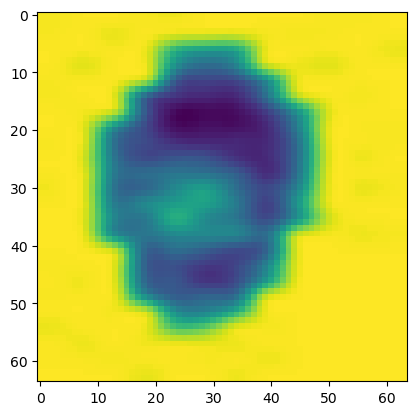

In [76]:
plt.imshow(X_train[0])